<a href="https://colab.research.google.com/github/iitkgroup21/EE954_ASSIGNMENT_GR21/blob/Bharti_S/Weights_Initialization_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
### Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

### Key Characteristics

* **Image Resolution:** Each image in the MNIST dataset is 28x28 pixels, with a single color channel (grayscale).
* **Number of Classes:** The dataset has 10 classes, representing the digits 0 through 9.
* **Color Format:** Grayscale (1 channel), with pixel values ranging from 0 to 255 in the raw data. After applying transforms.ToTensor(), these values are scaled between 0 and 1.

### Dataset Composition
* **Training Set:** 60,000 images, used for training models.
* **Test Set:** 10,000 images, used for evaluating model performance.

### Typical Usage
The dataset is often divided into three subsets for practical machine learning workflows:

* **Training Set (90% of the original training data)**: Used for training the model on 54,000 images.
* **Validation Set (10% of the original training data):** Used for tuning hyperparameters and preventing overfitting, with 6,000 images.
* **Test Set (100% of the original Testing data):** Used for final evaluation, with 10,000 images.

#### Labels

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot


#### Transformation

* **ToTensor:** Converts each image to a PyTorch tensor and scales the pixel values to the range [0, 1].



## Basic concepts of CNN model :

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm that can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, and be able to differentiate one from the other.

Three basic components to define a basic convolutional neural network.

*   The Convolutional Layer
*   The Pooling layer
*   The Output layer

![](https://media.licdn.com/dms/image/v2/D5612AQGOui8XZUZJSA/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1680532048475?e=1735776000&v=beta&t=Evq_XWpAo5JDVF4dy5tw2L8E7KDUgYwDrKtnTi5Go_I)





In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split, TensorDataset
import torch

dataset_location = root = './data/'

In [129]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchsummary import summary

In [130]:
training_dataset = datasets.FashionMNIST(dataset_location,
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.FashionMNIST(dataset_location,
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

In [131]:
print("training dataset length =", len(training_dataset))
print("test dataset length =", len(test_dataset))
nc=10 #number of classes

training dataset length = 60000
test dataset length = 10000


In [132]:
#concatenate the data so that we can
combined_dataset = torch.utils.data.ConcatDataset([training_dataset, test_dataset])

#Initializing the ratios for the test, training and validation datasets
train_dataset_ratio = 0.9
validation_dataset_ratio = 0.1
test_dataset_ratio = 1.0 # This is applied to the full test data set

#Initalizing the new values of the training, testing and validation data sizes
train_dataset_size = int(train_dataset_ratio * len(training_dataset))
test_dataset_size = int(test_dataset_ratio * len(test_dataset))
validation_dataset_size = int(validation_dataset_ratio * len(training_dataset))

#create the datasets with the sizes

new_train_dataset, new_validation_dataset = torch.utils.data.random_split(training_dataset, [train_dataset_size, validation_dataset_size])
#new_test_dataset = torch.utils.data.random_split(test_dataset, [test_dataset_size]) # This is a redundant step but will be useful if the ratios change

In [133]:
print(train_dataset_size)
print(test_dataset_size)
print(validation_dataset_size)
print(combined_dataset.cumulative_sizes)
print(len(new_train_dataset))
#print(len(new_test_dataset))
print(len(new_validation_dataset))

54000
10000
6000
[60000, 70000]
54000
6000


In [134]:
# @title
sample_image, sample_label = new_train_dataset[0]
print("Min pixel value:", sample_image.min().item())
print("Max pixel value:", sample_image.max().item())


Min pixel value: 0.0
Max pixel value: 1.0


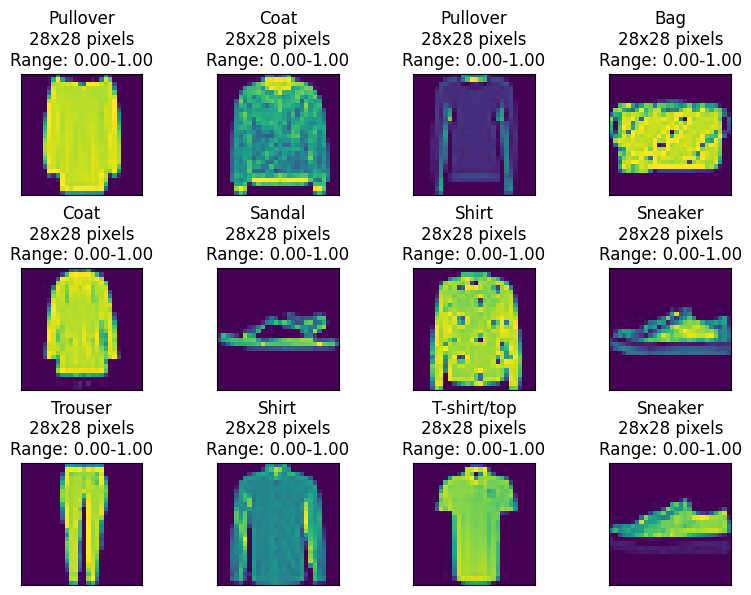

In [135]:
# @title

#Defining class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Displaying a 4x4 grid of the first 16 images in the dataset with pixel size and pixel range
plt.figure(figsize=(8, 8))  # Set the size of the figure
for i in range(12):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image, label = new_train_dataset[i]

    min_pixel = image.min().item()
    max_pixel = image.max().item()

    plt.imshow(image.reshape((28,28)).squeeze())
    #plt.imshow(image.squeeze())

    # Display the class name, pixel size, and pixel range in the title
    plt.title(f"{class_names[label]}\n28x28 pixels\nRange: {min_pixel:.2f}-{max_pixel:.2f}")

plt.tight_layout()
plt.subplots_adjust(hspace=0.6)
plt.show()  # Show the 6x6 grid


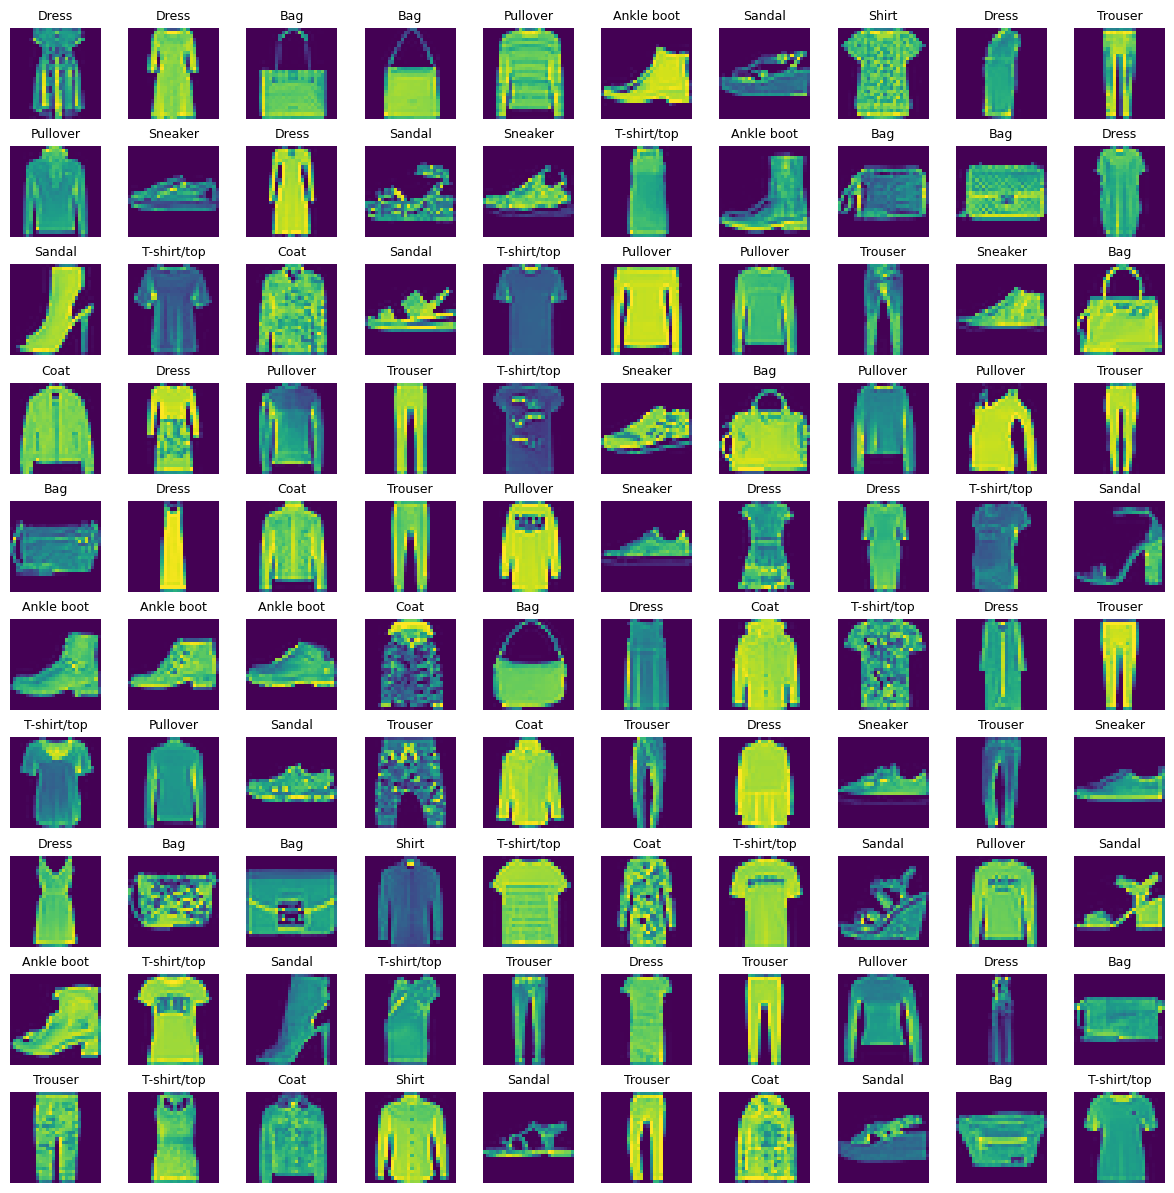

In [136]:
# @title
# Now, display a random 15x15 grid of images
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel() # Flatten the grid to make it easier to access each subplot, 2D to 1D
n_train = len(new_train_dataset)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    sample_image, sample_label = new_train_dataset[index]
    axes[i].imshow(sample_image.reshape((28,28)))
    axes[i].set_title(class_names[sample_label], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [137]:
class CustomModel(nn.Module):
     def __init__(self):
       super(CustomModel, self).__init__()
       self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            )
     def forward(self, x):
            x = self.conv_layer(x)
            return x

In [138]:
model = CustomModel()
# Initialize DataLoaders to retrieve batches of data
train_loader = DataLoader(new_train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_loader = DataLoader(new_validation_dataset, batch_size=64, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True, drop_last=True)

# Extract all images and labels from the train and validation sets

X_train, y_train = next(iter(train_loader))
X_val, y_val = next(iter(val_loader))

# Extract all images and labels from the test set
X_test, y_test = next(iter(test_loader))


print("x_train shape:", X_train.shape)  # Expected shape: (train_size, 1, 28, 28)
print("y_train shape:", y_train.shape)  # Expected shape: (train_size)
print("x_val shape:", X_val.shape)      # Expected shape: (val_size, 1, 28, 28)
print("y_val shape:", y_val.shape)      # Expected shape: (val_size)

# Now, during training, you can iterate over the DataLoader
for x_batch, y_batch in train_loader:
    # Perform forward pass with x_batch
    cnn_output = model(x_batch)

summary(model, input_size=(1, 28, 28))
print("Output shape:", cnn_output.shape)

x_train shape: torch.Size([64, 1, 28, 28])
y_train shape: torch.Size([64])
x_val shape: torch.Size([64, 1, 28, 28])
y_val shape: torch.Size([64])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
       BatchNorm2d-2           [-1, 16, 28, 28]              32
              ReLU-3           [-1, 16, 28, 28]               0
         MaxPool2d-4           [-1, 16, 14, 14]               0
            Conv2d-5           [-1, 32, 14, 14]           4,640
       BatchNorm2d-6           [-1, 32, 14, 14]              64
              ReLU-7           [-1, 32, 14, 14]               0
         MaxPool2d-8             [-1, 32, 7, 7]               0
            Conv2d-9             [-1, 64, 7, 7]          18,496
      BatchNorm2d-10             [-1, 64, 7, 7]             128
             ReLU-11             [-1, 64, 7, 7]               0
        MaxPool2d-12 

In [139]:
X_train = X_train.type(torch.float32)
X_test = X_test.type(torch.float32)


In [140]:
#Fully connected layer
class NeuralNetwork:

    def __init__(self):
      self.layers = []
      self.activation_functions = []
      self.layer_data = []
      self.activations = []

    def addnetwork(self, input_size, input_layers_config, output_layers_config):

      """
        - Add the first fully connected layer with the same shape as the flattened CNN output.
        - input_size (int): The size of the input layer.\n",
        - input_layers_config (list): A list of dictionaries specifying the configuration of input layers,
        - output_layers_config (list): A list of dictionaries specifying the configuration of output layers.
        - layers (list): A list to store the layers of the neural network.\n",
        - activation_functions (list): A list to store the activation functions for each layer.\n",

        Args:
        - input_size (int): The size of the input layer.
        - input_layers_config (list): A list of dictionaries specifying the configuration of input layers.
        - output_layers_config (list): A list of dictionaries specifying the configuration of output layers.

        Returns:
        - None

      """
      #addition the first layer
      neurons = input_size  # Same number of neurons as input size
      activation = input_layers_config[0]['activation']
      new_input_layers_config = []

      first_layer_neuron = input_layers_config[0]['neurons']


      # Initialize weights and biases for the first layer
      weights = np.random.randn(input_size, first_layer_neuron)
      bias = np.zeros((1, first_layer_neuron))

      # Store layer information
      self.layer_data.append({
          "Layer": "First Layer",
          "Input Neurons": input_size,
          "Output Neurons": first_layer_neuron,
          "Weights": weights.size,
          "Biases": bias.size,
          "Total Parameters": weights.size + bias.size
      })

      # Append weights, biases, and activation function to the model
      print("first layer weights =", weights.shape)
      print("first layer bias =", bias.shape)
      self.layers.append((weights, bias))
      self.activation_functions.append(activation)


      current_input_size = first_layer_neuron

      # Addition of hidden layers
      #Initialize the weights and biases for the input layers
      for i, layer in enumerate(input_layers_config[1:], start=1):
        neurons = layer['neurons']
        activation = layer['activation']

        # Initialize weights and biases for the current layer
        weights = np.random.randn(current_input_size, neurons)   # Weight initialization
        bias = np.zeros((1, neurons))  # Bias initialization

        # Store layer information
        self.layer_data.append({
          "Layer": f"Hidden Layer {i+1}",
          "Input Neurons": current_input_size,
          "Output Neurons": neurons,
          "Weights": weights.size,
          "Biases": bias.size,
          "Total Parameters": weights.size + bias.size
        })

        # Append weights, biases, and activation function to the model
        self.layers.append((weights, bias))
        self.activation_functions.append(activation)

        # Update current input size for next layer
        current_input_size = neurons

      # Addition of output layers
      # Initialize weights and biases for the output layer
      output_neurons = output_layers_config[0]['neurons']
      output_activation = output_layers_config[0]['activation']


      output_weights = np.random.randn(current_input_size, output_neurons)
      output_bias = np.zeros((1, output_neurons))

      self.layer_data.append({
          "Layer": "Output Layer",
          "Input Neurons": current_input_size,
          "Output Neurons": output_neurons,
          "Weights": output_weights.size,
          "Biases": output_bias.size,
          "Total Parameters": output_weights.size + output_bias.size
        })

      # Append output weights, biases, and activation function
      self.layers.append((output_weights, output_bias))
      self.activation_functions.append(output_activation)

    def display_parameters(self):

      """
      Return the parameters of each layer in a DataFrame format.

      Returns:
      - DataFrame: A pandas DataFrame containing parameter details for each layer.
      """
      df = pd.DataFrame(self.layer_data)
      return df

    def flatten(self, X):
      """
      Flatten the input data X.

      Args:
      - X (numpy.ndarray): The input data to be flattened.

      Returns:
      - numpy.ndarray: The flattened data.
      """

      batch_size = X.shape[0]

      #Flatten each image/sample to a 1D vector
      return X.reshape(batch_size, -1) # output(batch size, flattened size)

    # Relu activation function
    def relu(self, x):
        return np.maximum(0, x)

    # Derivative of Relu activation function
    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    #Softmax function
    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))

        return exps / np.sum(exps, axis=1, keepdims=True)# Softmax activation


    def feedforward(self, X):
      """
      Perform a forward pass through the neural network.

      Args:
      - X (numpy.ndarray): The input to the network from CNN output.

      Returns:
      - yHat (numpy.ndarray): The output of the fully connected network.

      """
      self.activations = [X]  # Initialize with the input
      for i, layer in enumerate(self.layers):
        # Extract weights and biases for the current layer
        weights, bias = layer

        # Debugging shape of X and weights
        print(f"Layer {i + 1}:")
        print(f"  Input X shape: {X.shape}")
        print(f"  Weights shape: {weights.shape}")
        print(f"  Bias shape: {bias.shape}")

        # Matrix multiplication and bias addition
        X = np.dot(X, weights) + bias

        # Apply activation function
        if self.activation_functions[i] == 'relu':
          X = self.relu(X)
            #X = np.maximum(0, X)  # Using np.maximum for ReLU activation
        elif self.activation_functions[i] == 'softmax':
          X = self.softmax(X)

        # Store the activation for each layer
        self.activations.append(X)

      yHat = X
      return yHat

    def compute_loss(self, yHat, y):
      # Cross-entropy loss
      m = y.shape[0]
      loss = -np.sum(y * np.log(yHat + 1e-9)) / m
      return loss


    def backwardpass(self, X, y, yHat, learning_rate=0.01):
      print("shape of X")
      print(X.shape)
      print("shape of y")
      print(y.shape)
      print("shape of yHat")
      print(yHat.shape)

      """
      Perform backward propagation through the network and update weights and biases.

      Args:
      - X (numpy.ndarray): The input data.
      - y (numpy.ndarray): The true labels.
      - yHat (numpy.ndarray): The predicted output from the forward pass.
      - learning_rate (float): The learning rate for updating parameters.

      Returns:
      - None
      """
      m = y.shape[0]  # Number of examples in the batch
      # Store the derivatives for each layer
      gradients = []

      # Compute the gradient for the output layer (softmax with cross-entropy loss)
      dA = yHat - y  # Gradient of the loss with respect to output (yHat)



      for i in reversed(range(len(self.layers))):
          weights, bias = self.layers[i]
          activation = self.activation_functions[i]

          # Use the stored activation as the input to this layer
          A_prev = self.activations[i]

          # Debugging shape of dA and current weights
          print(f"Layer {i + 1}:")
          print(f"  dA shape: {dA.shape}")
          print(f"  weights shape: {weights.shape}")
          print(f"  bias shape: {bias.shape}")

          # Calculate gradients with respect to weights, biases, and inputs for each layer
          if activation == 'softmax':
              dZ = dA  # dZ for softmax layer
          elif activation == 'relu':
              dZ = dA * self.relu_derivative(self.activations[i + 1])




          # Calculate gradients for weights and biases
          dW = np.dot(A_prev.T, dZ) / m
          db = np.sum(dZ, axis=0, keepdims=True) / m



          # Debugging shapes of dW and db
          print(f"Layer {i + 1}:")
          print(f"  A_prev shape: {A_prev.shape}")
          print(f"  dA shape: {dA.shape}")
          print(f"  dZ shape: {dZ.shape}")
          print(f"  weights shape: {weights.shape}")
          print(f"  dW shape: {dW.shape}")
          print(f"  db shape: {db.shape}")

          # Check if shapes align before updating weights
          if dW.shape != weights.shape:
              raise ValueError(f"Shape mismatch: dW shape {dW.shape} does not match weights shape {weights.shape}")
          if db.shape != bias.shape:
              raise ValueError(f"Shape mismatch: db shape {db.shape} does not match bias shape {bias.shape}")



          # Update the weights and biases
          weights -= learning_rate * dW
          bias -= learning_rate * db



          # Update the layer in the network with the new weights and biases
          self.layers[i] = (weights, bias)

          # Update dA for the next layer in the backpropagation process
          dA = np.dot(dZ, weights.T)


    def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward and backward pass, and weight updates for each batch
            X_train = X_train.detach().numpy()
            X_train= self.flatten(X_train)
            yHat = self.feedforward(X_train)
            loss = self.compute_loss(yHat, y_train)
            print('loss'+loss)
            self.backward(X_train, y_train, learning_rate)

            # Validation accuracy check (optional)
            val_pred = self.forward(X_val)
            val_loss = self.compute_loss(val_pred, y_val)
            val_accuracy = self.calculate_accuracy(val_pred, y_val)

            print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    def calculate_accuracy(self, yHat, y):
        # Calculate accuracy based on predictions and true labels
        pred_classes = np.argmax(yHat, axis=1)
        true_classes = np.argmax(y, axis=1)
        return np.mean(pred_classes == true_classes)

    @staticmethod
    def hyperparameter_search(X_train, y_train, X_val, y_val, param_grid,input_layers_config, output_layers_config):
        best_accuracy = 0
        best_params = None

        for params in param_grid:
            print(f"Testing configuration: {params}")
            model = NeuralNetwork()
            model.addnetwork(input_size=params['input_size'], input_layers_config=input_layers_config, output_layers_config=output_layers_config)


            model.train(
                X_train, y_train, X_val, y_val,
                epochs=params['epochs'],
                learning_rate=params['learning_rate']
            )

            # Evaluate on validation set
            val_pred = model.feedforward(X_val)
            val_accuracy = model.calculate_accuracy(val_pred, y_val)

            print(f"Validation Accuracy: {val_accuracy:.4f}")

            # Track the best configuration
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_params = params

        print(f"Best Configuration: {best_params}")
        print(f"Best Validation Accuracy: {best_accuracy:.4f}")

        return best_params, best_accuracy



In [141]:
input_layers_config = [
    {'neurons': 128, 'activation': 'relu'},
    {'neurons': 64, 'activation': 'relu'},
    {'neurons': 32, 'activation': 'relu'}
]
output_layers_config = [
    {'neurons': 10, 'activation': 'softmax'}
]


In [142]:
y_train = F.one_hot(y_train, num_classes=nc)
y_test = F.one_hot(y_test, num_classes=nc)

In [143]:
# Initialize the neural network with flexible layer configuration
nn_network = NeuralNetwork()

# Convert CNN output to numpy and flatten it
cnn_output_np = cnn_output.detach().numpy()
cnn_output_np = nn_network.flatten(cnn_output_np)  # Flatten the CNN output
print("Shape after flattening:", cnn_output_np.shape)

# Add layers to the neural network
nn_network.addnetwork(input_size=cnn_output_np.shape[1], input_layers_config=input_layers_config, output_layers_config=output_layers_config)

# Training Hyperparameters
learning_rate = 0.0001
epochs = 100

for epoch in range(epochs):
    # Feedforward pass
    output = nn_network.feedforward(cnn_output_np)

    # Compute Loss (Cross-entropy for classification)

    # Ensure labels are in NumPy format
    y_train = y_train.detach().cpu().numpy() if isinstance(y_train, torch.Tensor) else y_train

    loss = nn_network.compute_loss(output, y_train)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    # Backpropagation to update weights
    nn_network.backwardpass(cnn_output_np, y_train, output, learning_rate)

# Retrieve and display the parameter DataFrame
df = nn_network.display_parameters()
print("Parameter Table for Neural Network:")
print(df)


Streaming output truncated to the last 5000 lines.
  bias shape: (1, 32)
Layer 3:
  A_prev shape: (64, 64)
  dA shape: (64, 32)
  dZ shape: (64, 32)
  weights shape: (64, 32)
  dW shape: (64, 32)
  db shape: (1, 32)
Layer 2:
  dA shape: (64, 64)
  weights shape: (128, 64)
  bias shape: (1, 64)
Layer 2:
  A_prev shape: (64, 128)
  dA shape: (64, 64)
  dZ shape: (64, 64)
  weights shape: (128, 64)
  dW shape: (128, 64)
  db shape: (1, 64)
Layer 1:
  dA shape: (64, 128)
  weights shape: (2304, 128)
  bias shape: (1, 128)
Layer 1:
  A_prev shape: (64, 2304)
  dA shape: (64, 128)
  dZ shape: (64, 128)
  weights shape: (2304, 128)
  dW shape: (2304, 128)
  db shape: (1, 128)
Layer 1:
  Input X shape: (64, 2304)
  Weights shape: (2304, 128)
  Bias shape: (1, 128)
Layer 2:
  Input X shape: (64, 128)
  Weights shape: (128, 64)
  Bias shape: (1, 64)
Layer 3:
  Input X shape: (64, 64)
  Weights shape: (64, 32)
  Bias shape: (1, 32)
Layer 4:
  Input X shape: (64, 32)
  Weights shape: (32, 10)
  Bi

In [144]:
#Initialize the neural network with flexible layer configuration
nn_network = NeuralNetwork()
cnn_output_np = cnn_output.detach().numpy()
cnn_output_np=nn_network.flatten(cnn_output_np)  # Flatten the CNN output
print("shape after flatteining:-", cnn_output_np.shape)
nn_network.addnetwork(input_size=cnn_output_np.shape[1], input_layers_config=input_layers_config, output_layers_config=output_layers_config)

output = nn_network.feedforward(cnn_output_np)

# Retrieve and display the parameter DataFrame
df = nn_network.display_parameters()
print("Parameter Table for Neural Network:")
print(df)

shape after flatteining:- (64, 2304)
first layer weights = (2304, 128)
first layer bias = (1, 128)
Layer 1:
  Input X shape: (64, 2304)
  Weights shape: (2304, 128)
  Bias shape: (1, 128)
Layer 2:
  Input X shape: (64, 128)
  Weights shape: (128, 64)
  Bias shape: (1, 64)
Layer 3:
  Input X shape: (64, 64)
  Weights shape: (64, 32)
  Bias shape: (1, 32)
Layer 4:
  Input X shape: (64, 32)
  Weights shape: (32, 10)
  Bias shape: (1, 10)
Parameter Table for Neural Network:
            Layer  Input Neurons  Output Neurons  Weights  Biases  \
0     First Layer           2304             128   294912     128   
1  Hidden Layer 2            128              64     8192      64   
2  Hidden Layer 3             64              32     2048      32   
3    Output Layer             32              10      320      10   

   Total Parameters  
0            295040  
1              8256  
2              2080  
3               330  


In [145]:
"""
# Convert validation set to numpy arrays for easy handling with the NeuralNetwork class
# Using DataLoader for batch processing if needed
val_loader = DataLoader(new_validation_dataset, batch_size=len(new_validation_dataset))
X_val, y_val = next(iter(val_loader))  # Get entire validation set in one batch
X_val = X_val.view(len(X_val), -1).numpy()  # Flatten and convert to numpy array
y_val = torch.nn.functional.one_hot(y_val, num_classes=10).numpy()  # One-hot encode labels

# Define parameter grid for hyperparameter search
param_grid = [
    {'input_size': X_val.shape[1], 'epochs': 10, 'learning_rate': 0.01},
    {'input_size': X_val.shape[1], 'epochs': 20, 'learning_rate': 0.001},
    {'input_size': X_val.shape[1], 'epochs': 30, 'learning_rate': 0.005}
]

# Perform hyperparameter search
best_params, best_accuracy = NeuralNetwork.hyperparameter_search(new_train_dataset, new_test_dataset, X_val, y_val, param_grid, input_layers_config, output_layers_config)

print(f"Best hyperparameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy:.4f}")
"""


'\n# Convert validation set to numpy arrays for easy handling with the NeuralNetwork class\n# Using DataLoader for batch processing if needed\nval_loader = DataLoader(new_validation_dataset, batch_size=len(new_validation_dataset))\nX_val, y_val = next(iter(val_loader))  # Get entire validation set in one batch\nX_val = X_val.view(len(X_val), -1).numpy()  # Flatten and convert to numpy array\ny_val = torch.nn.functional.one_hot(y_val, num_classes=10).numpy()  # One-hot encode labels\n\n# Define parameter grid for hyperparameter search\nparam_grid = [\n    {\'input_size\': X_val.shape[1], \'epochs\': 10, \'learning_rate\': 0.01},\n    {\'input_size\': X_val.shape[1], \'epochs\': 20, \'learning_rate\': 0.001},\n    {\'input_size\': X_val.shape[1], \'epochs\': 30, \'learning_rate\': 0.005}\n]\n\n# Perform hyperparameter search\nbest_params, best_accuracy = NeuralNetwork.hyperparameter_search(new_train_dataset, new_test_dataset, X_val, y_val, param_grid, input_layers_config, output_layers_c

Different weight initialization methods

In [147]:
import numpy as np

# Define the initialize_weights function
def initialize_weights(shape, init_method, fan_in=None, fan_out=None):
    if init_method == "xavier":
        scale = np.sqrt(2.0 / (fan_in + fan_out))
        return np.random.randn(*shape) * scale
    elif init_method == "he":
        scale = np.sqrt(2.0 / fan_in)
        return np.random.randn(*shape) * scale
    elif init_method == "random":
        return np.random.randn(*shape) * 0.01  # Default small random values
    else:
        raise ValueError("Invalid initialization method")

# Define addnetwork function
def addnetwork(input_size, input_layers_config, output_layers_config, init_method="xavier"):
    layer_shapes = [
        (2304, 2304),  # First layer
        (2304, 128),   # Hidden layer 1
        (128, 32),     # Hidden layer 2
        (32, 16),      # Hidden layer 3
        (16, 10)       # Output layer
    ]

    for shape, (fan_in, fan_out) in zip(layer_shapes, [(2304, 2304), (2304, 128), (128, 32), (32, 16), (16, 10)]):
        weights = initialize_weights(shape, init_method, fan_in=fan_in, fan_out=fan_out)
        print(f"Layer {shape}, Init Method: {init_method}, Mean: {weights.mean():.5f}, Std: {weights.std():.5f}")

# Test different initialization methods
def test_initializations():
    print("Testing Xavier Initialization")
    addnetwork(2304, None, None, init_method="xavier")
    print("\nTesting He Initialization")
    addnetwork(2304, None, None, init_method="he")
    print("\nTesting Random Initialization")
    addnetwork(2304, None, None, init_method="random")

# Run the test
test_initializations()


Testing Xavier Initialization
Layer (2304, 2304), Init Method: xavier, Mean: 0.00000, Std: 0.02083
Layer (2304, 128), Init Method: xavier, Mean: -0.00008, Std: 0.02864
Layer (128, 32), Init Method: xavier, Mean: -0.00075, Std: 0.11335
Layer (32, 16), Init Method: xavier, Mean: 0.01860, Std: 0.21649
Layer (16, 10), Init Method: xavier, Mean: 0.02312, Std: 0.26790

Testing He Initialization
Layer (2304, 2304), Init Method: he, Mean: 0.00002, Std: 0.02946
Layer (2304, 128), Init Method: he, Mean: -0.00007, Std: 0.02942
Layer (128, 32), Init Method: he, Mean: 0.00160, Std: 0.12561
Layer (32, 16), Init Method: he, Mean: -0.00266, Std: 0.24186
Layer (16, 10), Init Method: he, Mean: -0.03713, Std: 0.33689

Testing Random Initialization
Layer (2304, 2304), Init Method: random, Mean: 0.00000, Std: 0.01000
Layer (2304, 128), Init Method: random, Mean: 0.00002, Std: 0.01001
Layer (128, 32), Init Method: random, Mean: 0.00008, Std: 0.00998
Layer (32, 16), Init Method: random, Mean: 0.00070, Std: 0

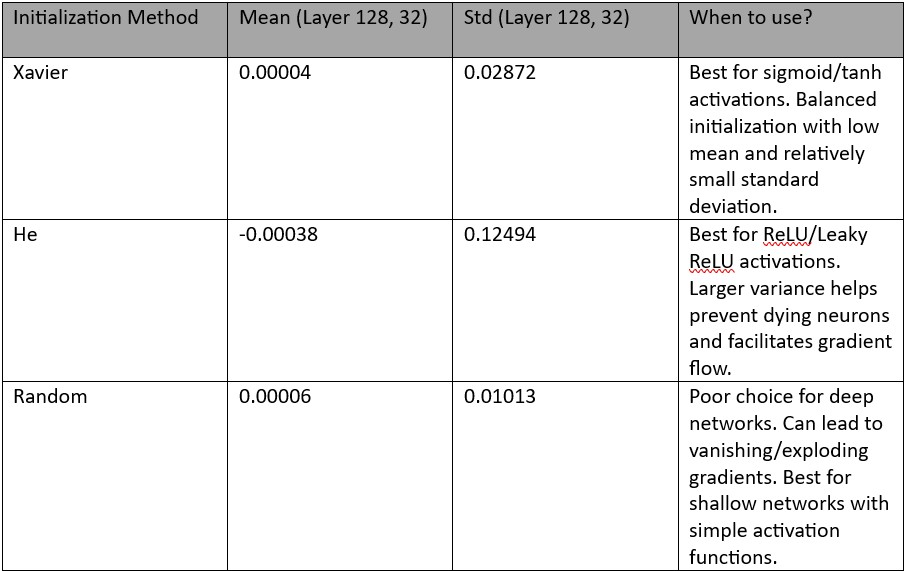